# K-Means Clustering

*Chat GPT Prompt: You are a professor teaching a group of Masters students with limited Machine Learning knowledge. In a couple of sentences, tell them what K-Means Clustering does and where it is used*

K-Means Clustering is a machine learning algorithm that partitions a dataset into K distinct, non-overlapping subsets (clusters) based on the similarity of data points. It aims to minimize the variance within each cluster while maximizing the variance between clusters. 

*Chat GPT Prompt: We will use K-Means clustering to get an output category based on some inputs. Briefly explain this to them in a couple of sentences*

In this application of K-Means clustering, we input data points without predefined categories, and the algorithm autonomously groups them into distinct clusters based on similarity. Each cluster represents a potential output category, enabling us to identify patterns and assign input data to specific groups, facilitating categorization and analysis in an unsupervised manner.

## Choosing the value of K

To choose the value of K, we can either apply the formula:

$ k=\sqrt{n} $ where $ n $ is the number of samples,

or test the technique using different values of K, plotting the total variation for each value of K. The ultimate value for K would be at the elbow of plot, where there is not much increased variation for a new value of K.

## Loading the data set

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the datasets
train_data = pd.read_csv('data/train_data.csv')
test_data = pd.read_csv('data/test_data.csv')
validate_data = pd.read_csv('data/validate_data.csv')

In [3]:
# Add together Plant Production, Imports and Renewables production to get total output to the grid
train_data_prod = train_data['Plant_Production_GWh'] + train_data ['Imports_GWh'] + train_data['Renewables_Production_GWh']
train_data_prod = pd.DataFrame(train_data_prod, columns= ['Grid_Output'])
test_data_prod = test_data['Plant_Production_GWh'] + test_data ['Imports_GWh'] + test_data['Renewables_Production_GWh']
test_data_prod = pd.DataFrame(test_data_prod, columns= ['Grid_Output'])
validate_data_prod = validate_data['Plant_Production_GWh'] + validate_data ['Imports_GWh'] + validate_data['Renewables_Production_GWh']
validate_data_prod = pd.DataFrame(validate_data_prod, columns= ['Grid_Output'])

# print(train_data_prod)

In [4]:
# Get the month from the date column to use as an additional feature and add it to the testing and validation set
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Month'] = train_data['Date'].dt.month

test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data['Month'] = test_data['Date'].dt.month

validate_data['Date'] = pd.to_datetime(validate_data['Date'])
validate_data['Month'] = validate_data['Date'].dt.month

In [5]:
def z_score_normalisation(train_data, test_data, val_data):
    # Calculate mean and standard deviation using the training set
    mean = train_data.mean()
    std_dev = train_data.std()

    # Apply Z-score normalisation to each set
    normalised_train_data = (train_data - mean) / std_dev
    normalised_test_data = (test_data - mean) / std_dev
    normalised_val_data = (val_data - mean) / std_dev

    return normalised_train_data, normalised_test_data, normalised_val_data

In [6]:
# Select relevant features for clustering
data_features = ['tmax', 'Max_Demand_GW']

#Normalise the temperature values
train_data['tmax'], test_data['tmax'], validate_data['tmax'] = z_score_normalisation(
    train_data['tmax'], test_data['tmax'], validate_data['tmax'])
    
train_features = pd.concat([train_data_prod, train_data[data_features]], axis = 1)
test_features = pd.concat([test_data_prod, test_data[data_features]], axis = 1)
validate_features = pd.concat([validate_data_prod, validate_data[data_features]], axis = 1)

# Normalise all the data
# train_features, test_features, validate_features = z_score_normalisation(train_features, test_features, validate_features)

print(train_features)

     Grid_Output      tmax  Max_Demand_GW
0         191.50 -1.143007           0.36
1         183.60 -1.283832           0.37
2         178.96 -1.002181           0.34
3         172.61 -0.438881           0.32
4         179.50  0.054006           0.32
..           ...       ...            ...
120       300.18 -1.143007           0.37
121       236.89 -1.354244           0.41
122       289.10 -0.861356           0.36
123       282.57 -0.377270           0.33
124       253.08  0.106816           0.34

[125 rows x 3 columns]


In [7]:
# Apply K-Means clustering to training data
clustersK = 5
kmeans = KMeans(n_clusters=clustersK, random_state=42)  # Adjust the number of clusters as needed
train_clusters = kmeans.fit_predict(train_features)

# Validate the clustering with silhouette score
silhouette_avg = silhouette_score(train_features, train_clusters)
print(f'Silhouette Score for Training Data: {silhouette_avg}')

C:\Users\erika\anaconda3\envs\ICS5110-Assmt-20231118\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\erika\anaconda3\envs\ICS5110-Assmt-20231118\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for Training Data: 0.5842357814564039


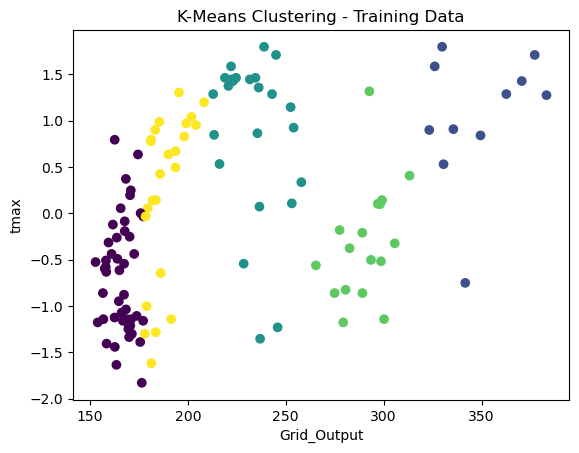

In [8]:
# Visualize the clusters in 2D
plt.scatter(train_features['Grid_Output'], train_features['tmax'], c=train_clusters, cmap='viridis')
plt.title('K-Means Clustering - Training Data')
plt.xlabel('Grid_Output')
plt.ylabel('tmax')
plt.show()

# Visualize the clusters in 2D
plt.scatter(train_features['Month'], train_features['tmax'], c=train_clusters, cmap='viridis')
plt.title('K-Means Clustering - Training Data')
plt.xlabel('Month')
plt.ylabel('tmax')
plt.show()

# Visualize the clusters in 3D (example with three features)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(train_features['Grid_Output'], train_features['Population_k'], train_features['tmax'], c=train_clusters, cmap='viridis')

ax.set_title('K-Means Clustering - Training Data (3D)')
ax.set_xlabel('Grid_Output_GWh')
ax.set_ylabel('Population_k')
ax.set_zlabel('tmax')

# Add colorbar
cb = plt.colorbar(scatter)
cb.set_label('Cluster')

plt.show()

In [9]:
# Validate the clustering on the validation set
validate_clusters = kmeans.predict(validate_features)

# Validate the clustering on the test set
test_clusters = kmeans.predict(test_features)

# Check the unique values in validate_clusters
unique_clusters = set(validate_clusters)
print(f'Unique Clusters in Validation Data: {unique_clusters}')

# If there is only one unique cluster, you may need to adjust the number of clusters in KMeans

# Save the labeled datasets
train_data.to_csv('labeled_train_data.csv', index=False)
test_data.to_csv('labeled_test_data.csv', index=False)
validate_data.to_csv('labeled_validate_data.csv', index=False)

# Save the cluster labels for the test and validation sets
test_data_with_clusters = pd.concat([test_data, pd.DataFrame({'Cluster': test_clusters})], axis=1)
test_data_with_clusters.to_csv('test_data_with_clusters.csv', index=False)

validate_data_with_clusters = pd.concat([validate_data, pd.DataFrame({'Cluster': validate_clusters})], axis=1)
validate_data_with_clusters.to_csv('validate_data_with_clusters.csv', index=False)

train_data_with_clusters = pd.concat([train_data, pd.DataFrame({'Cluster': train_clusters})], axis=1)
train_data_with_clusters.to_csv('train_data_with_clusters.csv', index=False)

Unique Clusters in Validation Data: {1, 2, 3, 4}


In [10]:
print('Data included: ',list(train_features.columns.values))
print(f'Number of clusters K: {clustersK}')
print(f'Unique Clusters in Validation Data: {unique_clusters}')
print(f'Silhouette Score for Training Data: {silhouette_avg}')

Data included:  ['Grid_Output', 'tmax', 'Max_Demand_GW']
Number of clusters K: 5
Unique Clusters in Validation Data: {1, 2, 3, 4}
Silhouette Score for Training Data: 0.5842357814564039


# Normalisation using Min Max Scaling

## Normalize the data
scaler = MinMaxScaler()

## Fit the scaler onto the training set
scaler.fit(train_data[data_features])

## Transform the feature columns in the training, validation, and test sets
train_data_normalized = pd.DataFrame(scaler.transform(train_data[data_features]), columns = data_features)
test_data_normalized = pd.DataFrame(scaler.transform(test_data[data_features]), columns = data_features)
val_data_normalized = pd.DataFrame(scaler.transform(validate_data[data_features]), columns = data_features)

train_features = pd.concat([train_data_prod, train_data_normalized], axis = 1)
test_features = pd.concat([test_data_prod, test_data_normalized], axis = 1)
validate_features = pd.concat([validate_data_prod, val_data_normalized], axis = 1)

## print(train_features, test_features, validate_features)
print(train_features)